## Load the libraries and Data set:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("C:\\Users\\user\\Downloads\\Dataset .csv", encoding ='unicode_escape')

In [11]:
df.shape

(9551, 21)

In [12]:
df.columns

Index(['ï»¿Restaurant ID', 'Restaurant Name', 'Country Code', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [13]:
df.head()

,ï»¿Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [14]:
print(df.columns)

Index(['ï»¿Restaurant ID', 'Restaurant Name', 'Country Code', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


## level1 task1:

In [46]:

cuisine_col = "Cuisines"

cuisines_series = (
    df[cuisine_col]
    .dropna()
    .str.split(",")
    .explode()
    .str.strip()
)

cuisine_counts = cuisines_series.value_counts()

top3_cuisines = cuisine_counts.head(3)

print("Top 3 Cuisines:")
print(top3_cuisines)

total_restaurants = len(df)
top3_percentages = (top3_cuisines / total_restaurants) * 100

print("\nTop 3 cuisines with percentages:")
print(top3_percentages.round(2))

Top 3 Cuisines:
North Indian    3960
Chinese         2735
Fast Food       1986
Name: Cuisines, dtype: int64

Top 3 cuisines with percentages:
North Indian    41.46
Chinese         28.64
Fast Food       20.79
Name: Cuisines, dtype: float64


## level1 task2:

In [16]:
city_col = "City"
rating_col = "Aggregate rating"

# 1) Count restaurants per city
city_counts = df[city_col].value_counts()

print("Top cities by number of restaurants:")
print(city_counts.head(10))

# City with the maximum restaurants
top_city = city_counts.idxmax()
print("\nCity with the most restaurants:", top_city, "(", city_counts.max(), ")")

# 2) Average rating per city
city_avg_rating = df.groupby(city_col)[rating_col].mean().sort_values(ascending=False)

print("\nAverage ratings per city (Top 10):")
print(city_avg_rating.head(10))

# City with highest average rating
best_city = city_avg_rating.idxmax()
print("\nCity with the highest average rating:", best_city, "(", city_avg_rating.max(), ")")

Top cities by number of restaurants:
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: City, dtype: int64

City with the most restaurants: New Delhi ( 5473 )

Average ratings per city (Top 10):
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Beechworth          4.600000
London              4.535000
Taguig City         4.525000
Tagaytay City       4.500000
Secunderabad        4.500000
Name: Aggregate rating, dtype: float64

City with the highest average rating: Inner City ( 4.9 )


## level1 task3 price range distribution:

Price range counts:
1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

Price range percentages:
1    46.53
2    32.59
3    14.74
4     6.14
Name: Price range, dtype: float64


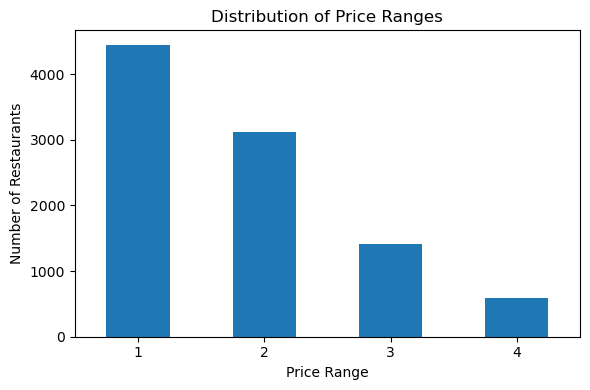

In [17]:
import matplotlib.pyplot as plt

price_col = "Price range"

# Counts and percentages
price_counts = df[price_col].value_counts().sort_index()
price_percent = (price_counts / len(df)) * 100

print("Price range counts:")
print(price_counts)

print("\nPrice range percentages:")
print(price_percent.round(2))

# Bar chart
plt.figure(figsize=(6,4))
price_counts.plot(kind="bar")
plt.title("Distribution of Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [19]:
import pandas as pd
df=pd.read_csv("C:\\Users\\user\\Downloads\\Dataset .csv",encoding="latin1")
print(df.head())
print(df.columns)

   ï»¿Restaurant ID         Restaurant Name  Country Code              City  \
0           6317637        Le Petit Souffle           162       Makati City   
1           6304287        Izakaya Kikufuji           162       Makati City   
2           6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                    Ooma           162  Mandaluyong City   
4           6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong 

## level1 task4 online delivary:

In [20]:
online_col = "Has Online delivery"
rating_col = "Aggregate rating"

# Count & percentage
online_counts = df[online_col].value_counts()
online_percent = (online_counts / len(df)) * 100

print("Online delivery counts:")
print(online_counts)

print("\nOnline delivery percentages:")
print(online_percent.round(2))

# Average rating comparison
avg_rating_by_delivery = df.groupby(online_col)[rating_col].mean()

print("\nAverage rating by online delivery:")
print(avg_rating_by_delivery)

Online delivery counts:
No     7100
Yes    2451
Name: Has Online delivery, dtype: int64

Online delivery percentages:
No     74.34
Yes    25.66
Name: Has Online delivery, dtype: float64

Average rating by online delivery:
Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64


## level2 task1 step 1 rating distribution:

Rating distribution:
0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
2.2      27
2.3      47
2.4      87
2.5     110
2.6     191
2.7     250
2.8     315
2.9     381
3.0     468
3.1     519
3.2     522
3.3     483
3.4     498
3.5     480
3.6     458
3.7     427
3.8     400
3.9     335
4.0     266
4.1     274
4.2     221
4.3     174
4.4     144
4.5      95
4.6      78
4.7      42
4.8      25
4.9      61
Name: Aggregate rating, dtype: int64


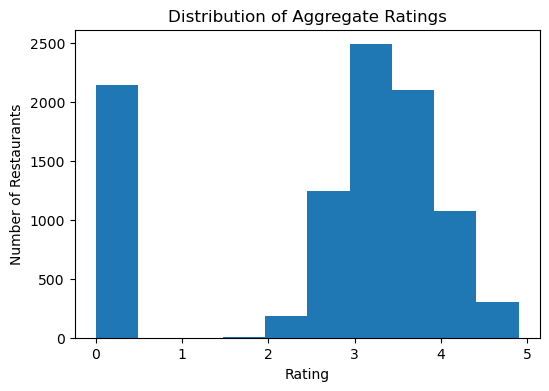

In [21]:
import matplotlib.pyplot as plt

rating_col = "Aggregate rating"

# Value counts of ratings
rating_counts = df[rating_col].value_counts().sort_index()
print("Rating distribution:")
print(rating_counts)

# Histogram of ratings
plt.figure(figsize=(6,4))
plt.hist(df[rating_col], bins=10)
plt.title("Distribution of Aggregate Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Restaurants")
plt.show()

## step2 most common rating range:

In [24]:
bins = [0, 1, 2, 3, 4, 5]
labels = ["0-1", "1-2", "2-3", "3-4", "4-5"]

df["Rating_range"] = pd.cut(df[rating_col], bins=bins, labels=labels, include_lowest=True)

rating_range_counts = df["Rating_range"].value_counts().sort_index()

print("\nRating range distribution:")
print(rating_range_counts)

# Most common rating range
most_common_range = rating_range_counts.idxmax()
print("\nMost common rating range:", most_common_range)


Rating range distribution:
0-1    2148
1-2      10
2-3    1891
3-4    4388
4-5    1114
Name: Rating_range, dtype: int64

Most common rating range: 3-4


## step3 average votes:

In [23]:
votes_col = "Votes"

avg_votes = df[votes_col].mean()
print("\nAverage number of votes received by restaurants:", round(avg_votes, 2))


Average number of votes received by restaurants: 156.91


## level2 task2 step1 extract cuisine pairs:

In [25]:
from itertools import combinations
from collections import Counter

# Clean and split cuisines
cuisine_lists = df["Cuisines"].dropna().apply(lambda x: [c.strip() for c in x.split(",")])

pair_counter = Counter()

# Count all pairs of cuisines
for cuisines in cuisine_lists:
    if len(cuisines) > 1:
        for pair in combinations(sorted(cuisines), 2):
            pair_counter[pair] += 1

# Convert to list of top combinations
top_pairs = pair_counter.most_common(10)

print("Top 10 Cuisine Combinations:")
for pair, count in top_pairs:
    print(pair, ":", count)

Top 10 Cuisine Combinations:
('Chinese', 'North Indian') : 1784
('Mughlai', 'North Indian') : 832
('Fast Food', 'North Indian') : 485
('Continental', 'North Indian') : 468
('Chinese', 'Fast Food') : 466
('North Indian', 'South Indian') : 405
('Chinese', 'Mughlai') : 379
('Chinese', 'South Indian') : 346
('Chinese', 'Continental') : 303
('Italian', 'North Indian') : 295


## step2 plot the top cuisine combinations:

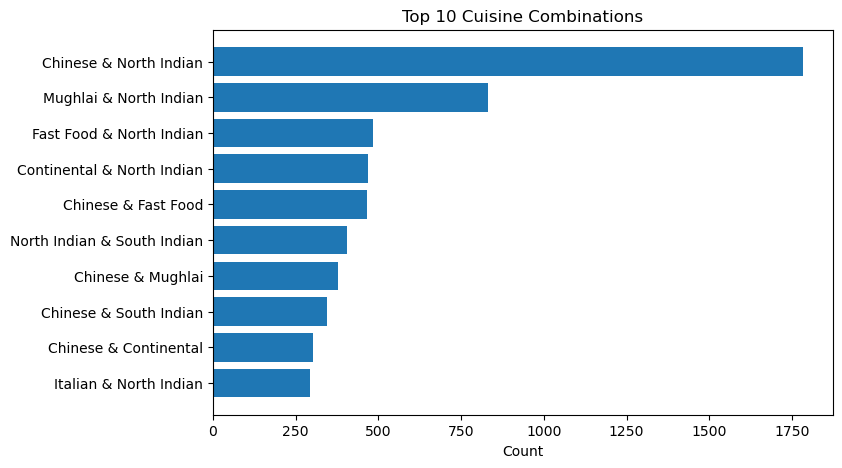

In [26]:
pairs = [f"{p[0]} & {p[1]}" for p, c in top_pairs]
counts = [c for p, c in top_pairs]

plt.figure(figsize=(8,5))
plt.barh(pairs, counts)
plt.xlabel("Count")
plt.title("Top 10 Cuisine Combinations")
plt.gca().invert_yaxis()
plt.show()

## level2 task 3 step1 restaurants per city:

In [27]:
city_counts = df["City"].value_counts().head(10)

print("Top 10 cities with highest restaurant density:")
print(city_counts)

Top 10 cities with highest restaurant density:
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: City, dtype: int64


## step2 scatter plot of latitude vs longitude:

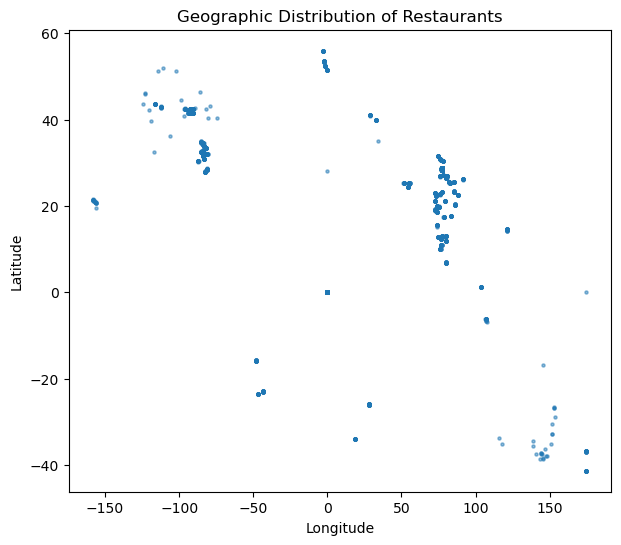

In [28]:
plt.figure(figsize=(7,6))
plt.scatter(df["Longitude"], df["Latitude"], s=5, alpha=0.5)
plt.title("Geographic Distribution of Restaurants")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## step3 density map:

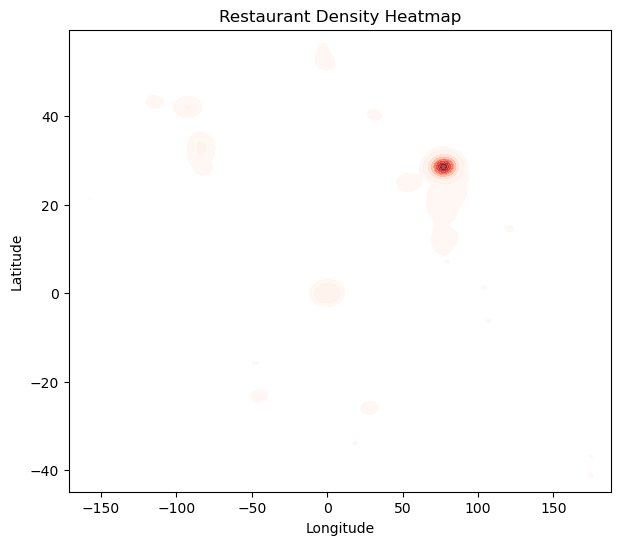

In [29]:
import seaborn as sns

plt.figure(figsize=(7,6))
sns.kdeplot(
    x=df["Longitude"],
    y=df["Latitude"],
    fill=True,
    cmap="Reds",
    bw_adjust=0.5,
    alpha=0.7
)
plt.title("Restaurant Density Heatmap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## RESTAURANT CHAIN ANALYSIS
## level2 task4 step1 count chains

In [30]:
chain_counts = df["Restaurant Name"].value_counts()

print("Top 10 Restaurant Chains:")
print(chain_counts.head(10))

Top 10 Restaurant Chains:
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: Restaurant Name, dtype: int64


## step2 bar chart for topo chains:

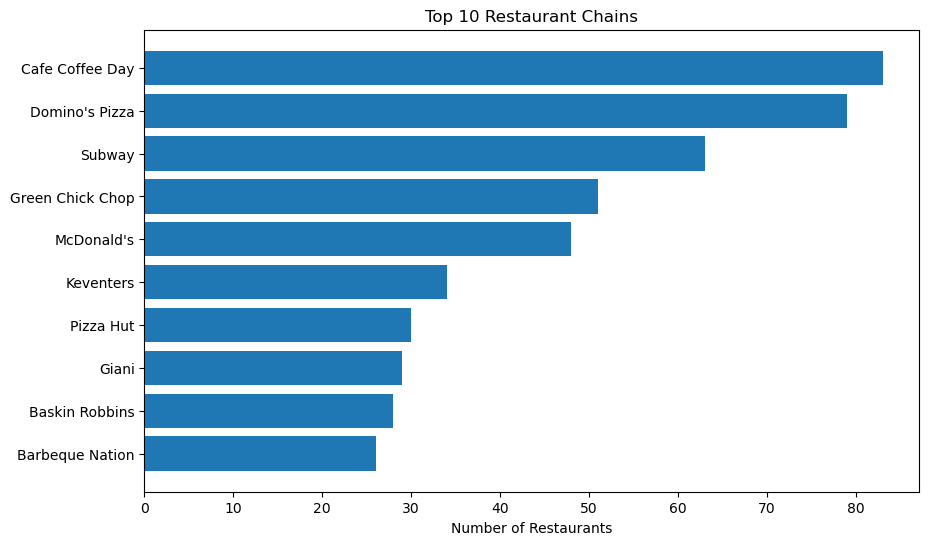

In [31]:
top_chains = chain_counts.head(10)

plt.figure(figsize=(10,6))
plt.barh(top_chains.index, top_chains.values)
plt.xlabel("Number of Restaurants")
plt.title("Top 10 Restaurant Chains")
plt.gca().invert_yaxis()
plt.show()

## level3:

In [32]:

print(df.columns)

Index(['ï»¿Restaurant ID', 'Restaurant Name', 'Country Code', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Rating_range'],
      dtype='object')


## step1  preprocess the rating text:

In [34]:
df["Rating text"] = df["Rating text"].astype(str).str.lower()

# Remove words like "rated"
df["clean_review"] = df["Rating text"].str.replace("rated", "").str.strip()

print(df["clean_review"].head())

0    excellent
1    excellent
2    very good
3    excellent
4    excellent
Name: clean_review, dtype: object


## step2 identify positive and negative keywords:

In [35]:
#step2 identify positive and negative keywords
positive_words = ["excellent", "very good", "good", "amazing", "great"]
negative_words = ["poor", "average", "bad", "not rated"]

# Count occurrences
pos_count = df["clean_review"].apply(lambda x: any(word in x for word in positive_words)).sum()
neg_count = df["clean_review"].apply(lambda x: any(word in x for word in negative_words)).sum()

print("Positive review count:", pos_count)
print("Negative review count:", neg_count)

Positive review count: 3480
Negative review count: 3923


## step3 average review length:

In [36]:

df["review_length"] = df["clean_review"].str.len()

avg_length = df["review_length"].mean()

print("Average review text length:", round(avg_length, 2))

Average review text length: 5.67


## step4relationship between review length and rating:

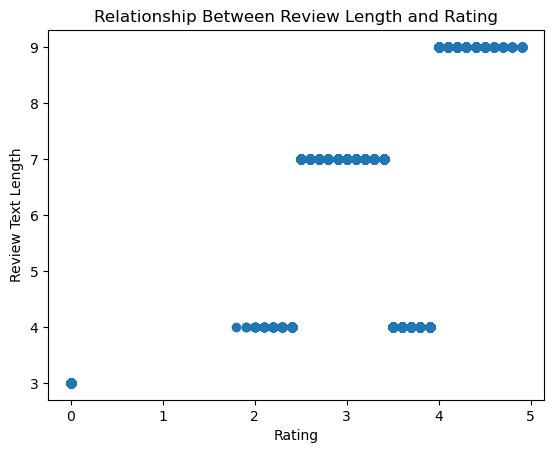

In [37]:
import matplotlib.pyplot as plt

plt.scatter(df["Aggregate rating"], df["review_length"])
plt.xlabel("Rating")
plt.ylabel("Review Text Length")
plt.title("Relationship Between Review Length and Rating")
plt.show()

## level3 task2 step1: Heighet & Lowest votes:

In [38]:
highest_votes = df.nlargest(10, "Votes")[["Restaurant Name", "City", "Votes", "Aggregate rating"]]
print("Top 10 Restaurants with Highest Votes:")
print(highest_votes)

# Lowest votes
lowest_votes = df.nsmallest(10, "Votes")[["Restaurant Name", "City", "Votes", "Aggregate rating"]]
print("\nTop 10 Restaurants with Lowest Votes:")
print(lowest_votes)

Top 10 Restaurants with Highest Votes:
                Restaurant Name       City  Votes  Aggregate rating
728                        Toit  Bangalore  10934               4.8
735                    Truffles  Bangalore   9667               4.7
3994           Hauz Khas Social  New Delhi   7931               4.3
2412                  Peter Cat    Kolkata   7574               4.3
739   AB's - Absolute Barbecues  Bangalore   6907               4.6
2414            Barbeque Nation    Kolkata   5966               4.9
743                 Big Brewsky  Bangalore   5705               4.5
2307  AB's - Absolute Barbecues  Hyderabad   5434               4.9
736             The Black Pearl  Bangalore   5385               4.1
2411                      BarBQ    Kolkata   5288               4.2

Top 10 Restaurants with Lowest Votes:
        Restaurant Name            City  Votes  Aggregate rating
69     Cantinho da Gula  Sï¿½ï¿½o Paulo      0               0.0
874       The Chaiwalas       Faridabad     

## step:2 Corelation between votes & rating:

In [39]:
correlation = df["Votes"].corr(df["Aggregate rating"])
print("Correlation between votes and rating:", correlation)

Correlation between votes and rating: 0.3136905841954117


## step3 votes vs Rating scatter plot:

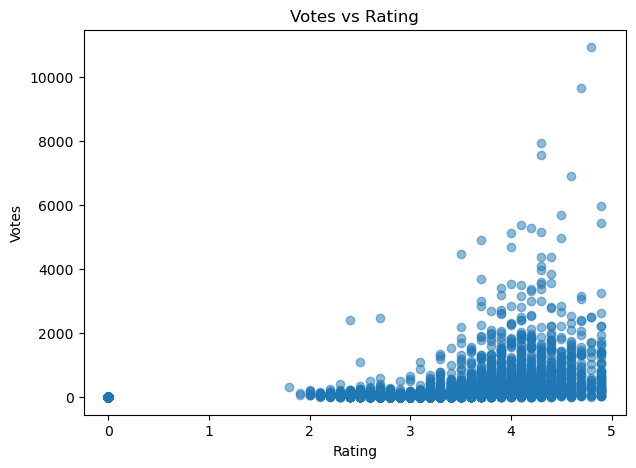

In [40]:
plt.figure(figsize=(7,5))
plt.scatter(df["Aggregate rating"], df["Votes"], alpha=0.5)
plt.xlabel("Rating")
plt.ylabel("Votes")
plt.title("Votes vs Rating")
plt.show()


## level3 task3 relationship between price range and online delivary:

In [41]:
online_delivery_price = df.groupby("Price range")["Has Online delivery"].value_counts().unstack().fillna(0)

print("Online delivery availability by price range:")
print(online_delivery_price)

Online delivery availability by price range:
Has Online delivery    No   Yes
Price range                    
1                    3743   701
2                    1827  1286
3                     997   411
4                     533    53


## step2 visalize only delivary vs price range:

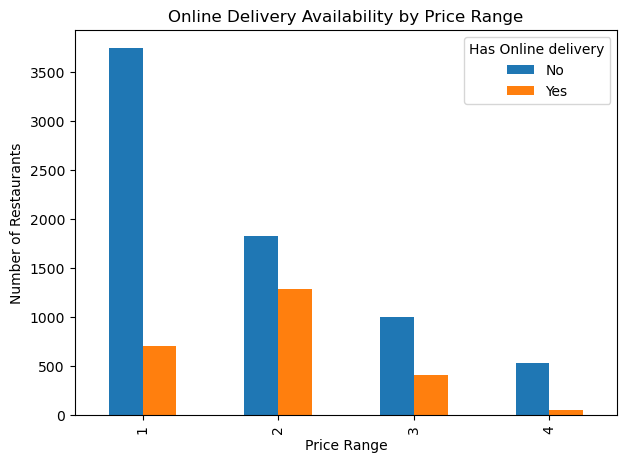

In [42]:
online_delivery_price.plot(kind="bar", figsize=(7,5))
plt.title("Online Delivery Availability by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.show()

## step4 relationship between price range and table booking:

In [43]:
table_booking_price = df.groupby("Price range")["Has Table booking"].value_counts().unstack().fillna(0)

print("\nTable booking availability by price range:")
print(table_booking_price)


Table booking availability by price range:
Has Table booking    No  Yes
Price range                 
1                  4443    1
2                  2874  239
3                   764  644
4                   312  274


## step5 visualize tablebooking vs pricerange:

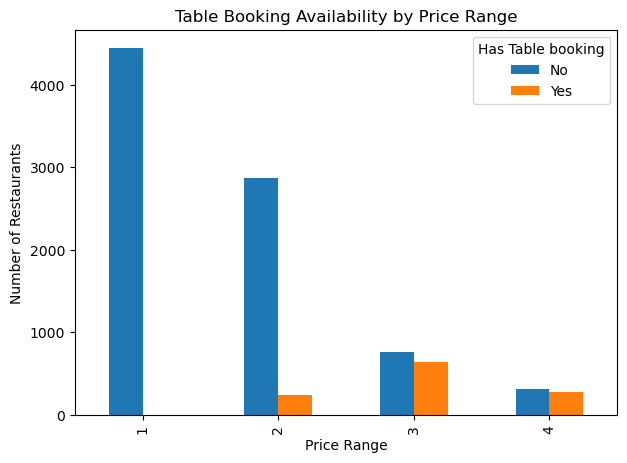

In [44]:
table_booking_price.plot(kind="bar", figsize=(7,5))
plt.title("Table Booking Availability by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.show()